<h1>Kreiranje heatmap-a dobivenih računanjem MFCC koeficijenata</h1>

D:\Updated files\training set\training-a\a0001.wav: 1
D:\Updated files\training set\training-a\a0002.wav: 1
D:\Updated files\training set\training-a\a0003.wav: 1
D:\Updated files\training set\training-a\a0004.wav: 1
D:\Updated files\training set\training-a\a0005.wav: 1
D:\Updated files\training set\training-a\a0006.wav: 1
D:\Updated files\training set\training-a\a0007.wav: -1
D:\Updated files\training set\training-a\a0008.wav: 1
D:\Updated files\training set\training-a\a0009.wav: -1
D:\Updated files\training set\training-a\a0010.wav: 1
D:\Updated files\training set\training-a\a0011.wav: -1
D:\Updated files\training set\training-a\a0012.wav: -1
D:\Updated files\training set\training-a\a0013.wav: 1
D:\Updated files\training set\training-a\a0014.wav: 1
D:\Updated files\training set\training-a\a0015.wav: 1
D:\Updated files\training set\training-a\a0016.wav: -1
D:\Updated files\training set\training-a\a0017.wav: 1
D:\Updated files\training set\training-a\a0018.wav: 1
D:\Updated files\traini

C:\Users\dajo\Anaconda3\envs\py36\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


D:\Updated files\training set\training-a\a0021.wav: 1
D:\Updated files\training set\training-a\a0022.wav: 1
D:\Updated files\training set\training-a\a0023.wav: 1
D:\Updated files\training set\training-a\a0024.wav: 1
D:\Updated files\training set\training-a\a0025.wav: -1
D:\Updated files\training set\training-a\a0026.wav: 1
D:\Updated files\training set\training-a\a0027.wav: -1
D:\Updated files\training set\training-a\a0028.wav: -1
D:\Updated files\training set\training-a\a0029.wav: -1
D:\Updated files\training set\training-a\a0030.wav: 1
D:\Updated files\training set\training-a\a0031.wav: 1
D:\Updated files\training set\training-a\a0032.wav: -1
D:\Updated files\training set\training-a\a0033.wav: 1
D:\Updated files\training set\training-a\a0034.wav: 1
D:\Updated files\training set\training-a\a0035.wav: -1
D:\Updated files\training set\training-a\a0036.wav: 1
D:\Updated files\training set\training-a\a0037.wav: 1
D:\Updated files\training set\training-a\a0038.wav: -1
D:\Updated files\trai

D:\Updated files\training set\training-a\a0172.wav: 1
D:\Updated files\training set\training-a\a0173.wav: 1
D:\Updated files\training set\training-a\a0174.wav: 1
D:\Updated files\training set\training-a\a0175.wav: 1
D:\Updated files\training set\training-a\a0176.wav: 1
D:\Updated files\training set\training-a\a0177.wav: 1
D:\Updated files\training set\training-a\a0178.wav: -1
D:\Updated files\training set\training-a\a0179.wav: -1
D:\Updated files\training set\training-a\a0180.wav: 1
D:\Updated files\training set\training-a\a0181.wav: -1
D:\Updated files\training set\training-a\a0182.wav: 1
D:\Updated files\training set\training-a\a0183.wav: 1
D:\Updated files\training set\training-a\a0184.wav: -1
D:\Updated files\training set\training-a\a0185.wav: -1
D:\Updated files\training set\training-a\a0186.wav: 1
D:\Updated files\training set\training-a\a0187.wav: 1
D:\Updated files\training set\training-a\a0188.wav: 1
D:\Updated files\training set\training-a\a0189.wav: -1
D:\Updated files\train

D:\Updated files\training set\training-a\a0325.wav: -1
D:\Updated files\training set\training-a\a0326.wav: 1
D:\Updated files\training set\training-a\a0327.wav: 1
D:\Updated files\training set\training-a\a0328.wav: -1
D:\Updated files\training set\training-a\a0329.wav: -1
D:\Updated files\training set\training-a\a0330.wav: -1
D:\Updated files\training set\training-a\a0331.wav: 1
D:\Updated files\training set\training-a\a0332.wav: -1
D:\Updated files\training set\training-a\a0333.wav: 1
D:\Updated files\training set\training-a\a0334.wav: -1
D:\Updated files\training set\training-a\a0335.wav: 1
D:\Updated files\training set\training-a\a0336.wav: 1
D:\Updated files\training set\training-a\a0337.wav: -1
D:\Updated files\training set\training-a\a0338.wav: 1
D:\Updated files\training set\training-a\a0339.wav: 1
D:\Updated files\training set\training-a\a0340.wav: -1
D:\Updated files\training set\training-a\a0341.wav: 1
D:\Updated files\training set\training-a\a0342.wav: -1
D:\Updated files\tr

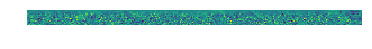

In [2]:
import pandas as pd
import numpy as np
from scipy.io import wavfile
import os
from sklearn.utils import shuffle
from random import sample
from scipy.fftpack import dct
import matplotlib.pyplot as plt

# prima stazu file-a, vrijeme pocetka prvog S1 tona, veličinu okvira i udaljenost(razmak)
def mfcc_features(path_file,br, frame_size, frame_stride):              
    sample_rate, signal = wavfile.read(path_file)
    signal = signal[br:int(3 * sample_rate)]    # rezanje 3 sekunde od prvog S1 tona
    pre_emphasis = 0.97
    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # konvertiranje iz sekunda u sample-ove
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # osiguravanje da postoji barem jedan frame(prozor)

    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(emphasized_signal, z) # signal padding kako bi svi frame-ovi imali jednak broj sample-ova

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) +\
        np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    # hamming window
    frames *= np.hamming(frame_length)

    NFFT = 512
    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # magnituda od FFT
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # power spektar

    nfilt = 40
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
    filter_banks = 20 * np.log10(filter_banks)  # dB
    
    num_ceps = 13
    mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
    
    cep_lifter = 22
    (nframes, ncoeff) = mfcc.shape
    n = np.arange(ncoeff)
    lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
    mfcc *= lift  #*
    
    return filter_banks, mfcc

def normalized_fb(fb):
    fb -= (np.mean(fb, axis=0) + 1e-8)
    return fb

def normalized_mfcc(mfcc):
    mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
    return mfcc


# prima path file-a, pocetak od S1 i ako je abnormalan vrijednost 1, inace -1
def saveHeatmap(path_file,br, abnormal):        
    frame_size = 0.025
    frame_stride = 0.01
    fb, mfcc2 = mfcc_features(path_file,k, frame_size, frame_stride)
    mat = np.matrix(normalized_mfcc(mfcc2))
    mat = np.transpose(mat)
    plt.clf()
    plt.figure()
    plt.imshow(mat)
    plt.axis('off')
    file_name = os.path.splitext(os.path.basename(path_file))[0]
    if abnormal == '1':
        save_path = 'D:\\abnormal2\\' + file_name + '.jpg';
    else:
        save_path = 'D:\\normal2\\' + file_name + '.jpg';
    #print(save_path)
    plt.savefig(save_path ,bbox_inches='tight',transparent=False, pad_inches=0)
    
    
import os
import scipy.io as sio
import numpy as np
import csv
import itertools
import glob
import librosa
import scipy.io.wavfile as wav

V=['b','c','d','e','f']

podaci=[]    #sadrzi podatke o segmentaciji svakog zapisa
labels=[]    #sadrzi oznake normal/abnormal i da li je noisy
wavs=[]      #sample_rate, data from wav file
paths=[]
s=0
k=0
#ucitavanje rezultata segmentacije te vadenje znacajki
for l in V:
    os.chdir('D:\\Updated files\\training_set_signal_quality\\training-'+l)
    with open('REFERENCE_withSQI.csv','r') as f:
        reader=csv.reader(f)
        L=list(reader)
    L=[i[1:] for i in L]
    labels.append(L)
    os.chdir('D:\\Updated files\\training set\\training-'+l)
    for filename in glob.glob('*.wav'):
        wavs.append(wav.read(filename))
        paths.append('D:\\Updated files\\training set\\training-'+ l + '\\' + filename)
labels=list(itertools.chain.from_iterable(labels))   #spajanje lista

###################################################
podaci1=[]
for l in V:
    os.chdir('D:\\Updated files\\training_set_annotations_hand_corrected\\training-'+l+'_StateAns')
    for filename in os.listdir():
        podatak=sio.loadmat(filename)
        podatak=podatak['state_ans']
        time=np.column_stack(podatak[:,0]).flatten()
        try:
            state=np.concatenate(np.column_stack(podatak[:,1]).flatten())
        except ValueError:                                                  #  ucitavanje da podaci budu normalne liste
            state=np.column_stack(podatak[:,1]).flatten()                   # a ne liste u listi u list u listi.....
            state=np.column_stack(state).flatten()
        podaci.append([time,state]) 
        
for l in V:
    os.chdir('D:\\Updated files\\20160725_automated David Springer\'s annotations for training set\\training-'+l+'-Aut')
    for filename in os.listdir():
        podatak=sio.loadmat(filename)
        podatak=podatak['state_ans0']
        time1=np.column_stack(podatak[:,0]).flatten()
        try:
            state=np.concatenate(np.column_stack(podatak[:,1]).flatten())
        except ValueError:
            state=np.column_stack(podatak[:,1]).flatten()                   
            state=np.column_stack(state).flatten()
        podaci1.append([time,state])       
pocetak=[]    


for i in range(len(podaci)):
    if(labels[i][1]==1):
        pocetak.append(podaci[i][0][np.where(podaci[i][1]=='S1')[0][0]])
    else:
        pocetak.append(podaci1[i][0][np.where(podaci1[i][1]=='S1')[0][0]])


        
# stvaranje heatmap-a pocevsi od prvog tona S1
for i in range(0, len(paths)):
    print(paths[i] + ": " + labels[i][0])
    saveHeatmap(paths[i],pocetak[i], labels[i][0]) 